In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
GT=pd.read_csv("gas_turbines.csv")

In [3]:
GT

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
GT.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
df=GT[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX', 'TEY']]

In [6]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [7]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [8]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [9]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [10]:
df.shape

(15039, 11)

In [11]:
X.shape

(15039, 10)

In [12]:
Y.shape

(15039,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [15]:
x_train.shape

(12031, 10)

In [16]:
y_train.shape

(12031,)

# Creating Model

In [17]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1, activation='ReLU'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile model
model.compile(loss ='mse', optimizer='adam', metrics=['mse','mae'])

In [20]:
#Fit the model
history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs =50, batch_size=1000)

Epoch 1/50
13/13 [==============================] - 8s 164ms/step - loss: 4707.8403 - mse: 4707.8403 - mae: 55.4290 - val_loss: 969.2721 - val_mse: 969.2721 - val_mae: 27.3711
Epoch 2/50
13/13 [==============================] - 0s 37ms/step - loss: 1176.5729 - mse: 1176.5729 - mae: 30.5570 - val_loss: 292.7612 - val_mse: 292.7612 - val_mae: 14.3554
Epoch 3/50
13/13 [==============================] - 0s 27ms/step - loss: 326.0859 - mse: 326.0859 - mae: 14.7186 - val_loss: 343.8190 - val_mse: 343.8190 - val_mae: 15.5184
Epoch 4/50
13/13 [==============================] - 0s 21ms/step - loss: 252.4506 - mse: 252.4506 - mae: 12.5560 - val_loss: 260.0351 - val_mse: 260.0351 - val_mae: 13.2715
Epoch 5/50
13/13 [==============================] - 0s 31ms/step - loss: 228.4725 - mse: 228.4725 - mae: 11.8003 - val_loss: 221.6287 - val_mse: 221.6287 - val_mae: 11.4116
Epoch 6/50
13/13 [==============================] - 0s 24ms/step - loss: 218.6686 - mse: 218.6686 - mae: 11.1647 - val_loss: 216.6

In [21]:
model.save_weights("mywt.kmw")

# Evaluate The Model


In [24]:
scores = model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 2s 4ms/step - loss: 81.8367 - mse: 81.8367 - mae: 7.1785
mse: 8183.67%


# Visualize Training History


In [25]:

# list all data in history
model.history.history.keys()
import matplotlib.pyplot as plt

In [26]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

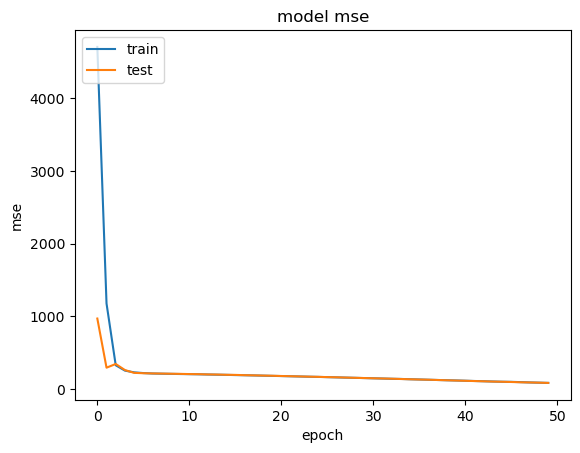

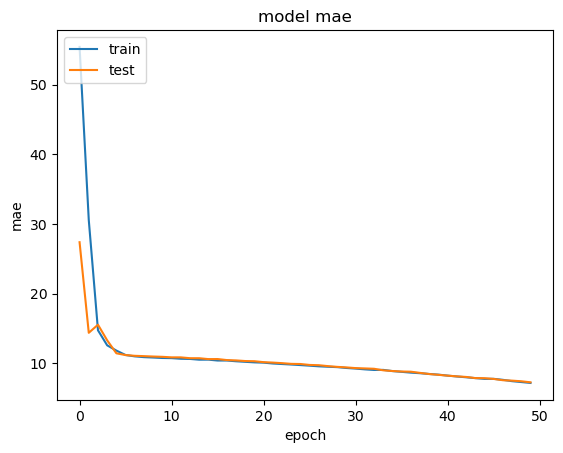

In [27]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize History For Loss


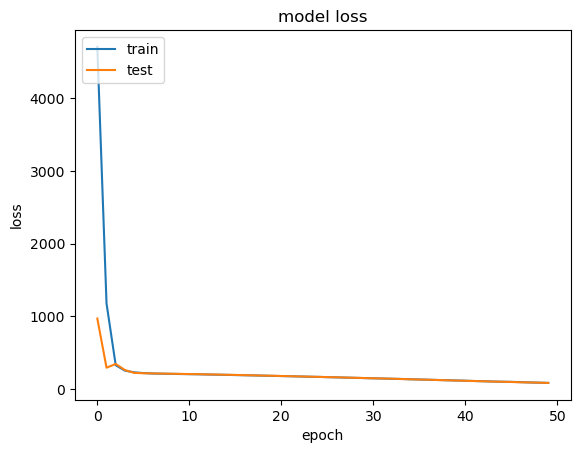

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate The Model


In [29]:
y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

94/94 [==============================] - 1s 6ms/step
Training set rmse: 9.046, Testing set rmse: 9.113


# Randomized SearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [31]:
# Building a keras regression model

def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

# Wrapping The Keras Model In a Object


In [32]:

keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

In [33]:
# Define the search parameters

batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


# Create a dictionary of the parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


# Summarize The Results


In [34]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)


Best score: -2.2795890092849733
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.01, 'init': 'normal', 'epochs': 50, 'batch_size': 100, 'activation_function': 'linear'}


In [35]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])


Epoch 1/50
121/121 [==============================] - 17s 16ms/step - loss: 500.7162 - mse: 500.7162 - mae: 15.7432 - val_loss: 202.8723 - val_mse: 202.8723 - val_mae: 10.8686
Epoch 2/50
121/121 [==============================] - 1s 9ms/step - loss: 144.9957 - mse: 144.9957 - mae: 9.1817 - val_loss: 68.3226 - val_mse: 68.3226 - val_mae: 6.4493
Epoch 3/50
121/121 [==============================] - 1s 10ms/step - loss: 45.8612 - mse: 45.8612 - mae: 5.0214 - val_loss: 30.6727 - val_mse: 30.6727 - val_mae: 4.4056
Epoch 4/50
121/121 [==============================] - 1s 9ms/step - loss: 18.6476 - mse: 18.6476 - mae: 3.2206 - val_loss: 13.1154 - val_mse: 13.1154 - val_mae: 2.8436
Epoch 5/50
121/121 [==============================] - 1s 10ms/step - loss: 12.6042 - mse: 12.6042 - mae: 2.7859 - val_loss: 12.3370 - val_mse: 12.3370 - val_mae: 2.9357
Epoch 6/50
121/121 [==============================] - 1s 9ms/step - loss: 11.2919 - mse: 11.2919 - mae: 2.6962 - val_loss: 13.8084 - val_mse: 13.808

# Plotting Loss(MSE) After Tuning


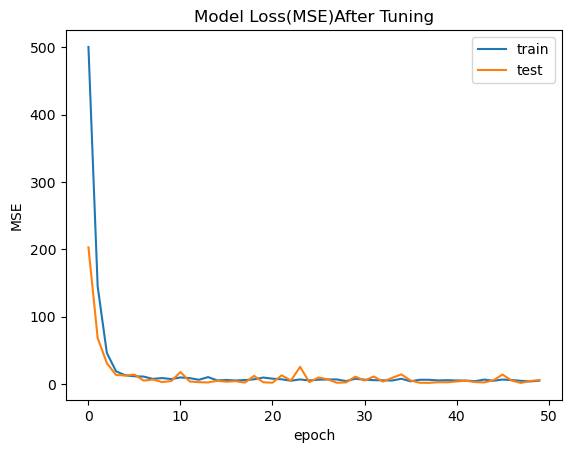

In [36]:

plt.title('Model Loss(MSE)After Tuning')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()

# Evaluate The Model


In [37]:

y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 4ms/step
Training set rmse : 2.350, Testing set rmse: 2.382


# Comparing The Model

In [38]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
result

,models,train rmse,test rmse
0,base model,9.046365,9.112587
1,tuned model,2.349988,2.381538


For both base model and tuned model, the difference between rmse for train and test set is very low indicating almost no overfitting.

For tuned model,the rmse has decreased compared to base model suggesting that hypertuning parameters has increased the efficiency of this regression model